# Task 2: numpy’s Normal Distribution

### Problem Description
We want to see how effectively `numpy.random.normal()` generates data that appear normally distributed. Specifically:
- Generate **100,000** random values with mean = **10.0** and standard deviation = **3.0**.
- Use the **Shapiro-Wilk test** (`scipy.stats.shapiro()`) to check if our sample could come from a normal distribution.
- Plot a histogram of our generated data and overlay the theoretical **normal PDF** for comparison.


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm

# Set a seed for reproducible results - optional so can remove if eneeded
np.random.seed(42)
sample = np.random.normal(loc=10.0, scale=3.0, size=1000)

In [7]:
# 1. Generate the sample
sample_size = 100_000
mean, std_dev = 10.0, 3.0
sample = np.random.normal(loc=mean, scale=std_dev, size=sample_size)

In [19]:
# 2. Shapiro-Wilk test
# Note: Shapiro can be sensitive for large samples, we can use a sub-sample
test_stat, p_value = shapiro(sample)  # Using a slice for practicality

# Rounding for readability to 4 places - chose not to use; but leaving in
rounded_test_stat = round(test_stat,4)
rounded_p_value = round(p_value,4)

print("Shapiro-Wilk Test Statistic:", test_stat)
print("Shapiro-Wilk p-value:", p_value)

Shapiro-Wilk Test Statistic: 0.9999920129776001
Shapiro-Wilk p-value: 0.9999619722366333


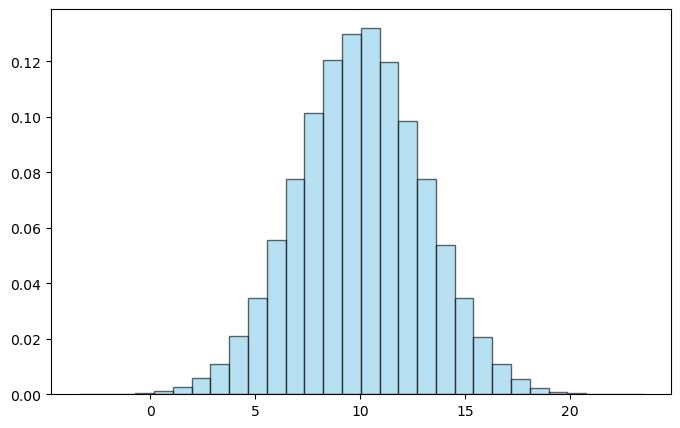

In [26]:
# 3. Plot the Histogram vs. Theoretical Normal PDF
plt.figure(figsize=(8,5))

# Plot the histogram in density mode so we can compare to PDF
count, bins, _ = plt.hist(sample, bins=30, density=True,
                          alpha=0.6, color='skyblue', edgecolor='black',
                          label='Histogram')

In [28]:
# Generate points for the PDF
x_values = np.linspace(min(sample), max(sample),200)
pdf_values = norm.pdf(x_values, loc=10.0, scale=3.0)

In [ ]:
# Plot PDF with a label
plt.plot(x_values, pdf_values, 'r--', linewidth=2, label='Normal PDF')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


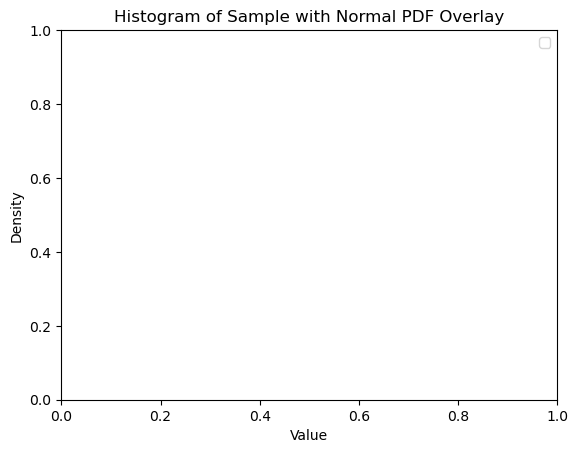

In [32]:
# Configure plot
plt.title("Histogram of Sample with Normal PDF Overlay")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()